In [2]:
from geoband.API import *

In [3]:
import folium
import json
import geopandas as gpd

In [58]:
import numpy as np
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import json
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from sklearn.cluster import KMeans

### API로 데이터 불러오기

In [61]:
# API로 데이터 불러오기 
GetCompasData('SBJ_2012_001', '1', '1.오산시_주정차단속(2018~2020).csv')
GetCompasData('SBJ_2012_001', '2', '2.오산시_어린이교통사고_격자.geojson')
GetCompasData('SBJ_2012_001', '3', '3.오산시_차량등록현황_격자.geojson')
GetCompasData('SBJ_2012_001', '4', '4.오산시_연령별_거주인구격자(총인구).geojson')
GetCompasData('SBJ_2012_001', '5', '5.오산시_연령별_거주인구격자(유소년).geojson')
GetCompasData('SBJ_2012_001', '6', '6.오산시_연령별_거주인구격자(생산가능인구).geojson')
GetCompasData('SBJ_2012_001', '7', '7.오산시_연령별_거주인구격자(고령).geojson')
GetCompasData('SBJ_2012_001', '8', '8.오산시_유동인구(2019).csv')

GetCompasData('SBJ_2012_001', '9', '9.오산시_어린이보호구역.csv')
GetCompasData('SBJ_2012_001', '10', '10.오산시_학교위치정보.csv')
GetCompasData('SBJ_2012_001', '11', '11.오산시_초등학교_통학구.geojson')
GetCompasData('SBJ_2012_001', '12', '12.오산시_중학교_학군.geojson')
GetCompasData('SBJ_2012_001', '13', '13.오산시_어린이집_유치원현황.csv')

GetCompasData('SBJ_2012_001', '14', '14.오산시_기상데이터(2010~2019).csv')

GetCompasData('SBJ_2012_001', '15', '15.오산시_무인교통단속카메라.csv')
GetCompasData('SBJ_2012_001', '16', '16.오산시_도로안전표지표준데이터.csv')
GetCompasData('SBJ_2012_001', '17', '17.오산시_횡단보도.geojson')
GetCompasData('SBJ_2012_001', '18', '18.오산시_과속방지턱표준데이터.csv')
GetCompasData('SBJ_2012_001', '19', '19.오산시_신호등.geojson')
GetCompasData('SBJ_2012_001', '20', '20.오산시_CCTV설치현황.csv')

GetCompasData('SBJ_2012_001', '21', '21.오산시_인도.geojson')
GetCompasData('SBJ_2012_001', '22', '22.오산시_버스정류장.csv')

GetCompasData('SBJ_2012_001', '23', '23.오산시_상세도로망_LV6.geojson')
GetCompasData('SBJ_2012_001', '24', '24.평일_전일,시간대별_오산시_추정교통량_Level6.csv')
GetCompasData('SBJ_2012_001', '25', '25.평일_전일_오산시_혼잡빈도강도_Level6.csv')
GetCompasData('SBJ_2012_001', '26', '26.평일_전일_오산시_혼잡시간강도_Level6.csv')

GetCompasData('SBJ_2012_001', '27', '27.오산시_도로명주소_건물.geojson')
GetCompasData('SBJ_2012_001', '28', '28.오산시_건물연면적_격자.geojson')

GetCompasData('SBJ_2012_001', '29', '29.오산시_체육시설현황.csv')
GetCompasData('SBJ_2012_001', '30', '30.오산시_학원_및_교습소_현황.csv')

GetCompasData('SBJ_2012_001', '31', '31.오산시_법정경계(시군구).geojson')
GetCompasData('SBJ_2012_001', '32', '32.오산시_행정경계(읍면동).geojson')
GetCompasData('SBJ_2012_001', '33', '33.오산시_법정경계(읍면동).geojson')

GetCompasData('SBJ_2012_001', '34', '34.오산시_지적도.geojson')




## 1. 주정차 단속 데이터 확인 및 전처리

In [19]:
주정차단속 = pd.read_csv('1.오산시_주정차단속(2018~2020).csv')

In [20]:
주정차단속
# 61701개 행, 7 column의 데이터

,단속일자,단속위치,행정구역,스쿨존여부,단속위치_경도,단속위치_위도,단속종류
0,20181101,금암동 여계산로 부근,경기도 오산시 세교동,N,127.043462,37.170237,이동형CCTV단속
1,20181101,세교동 세마역로19번길,경기도 오산시 세교동,N,127.044770,37.181695,이동형CCTV단속
2,20181101,세교동 수목원로 부근,경기도 오산시 양산동,N,127.042200,37.186357,이동형CCTV단속
3,20181101,오산동 오산로272번길 부,경기도 오산시 원동,N,127.071732,37.150557,이동형CCTV단속
4,20181101,오산동 성호대로93번길,경기도 오산시 부산동,N,127.071757,37.150457,이동형CCTV단속
...,...,...,...,...,...,...,...
61696,20201111,GS25궐동대호점 맞은편,경기도 오산시 청학동,N,127.053064,37.158140,고정형CCTV단속
61697,20201111,물향기지하도,경기도 오산시 원동,N,127.066157,37.171143,고정형CCTV단속
61698,20201111,운암2단지 근린공원삼거,경기도 오산시 청호동,N,127.077283,37.158126,고정형CCTV단속
61699,20201111,궐동 양평해장국 사거리,경기도 오산시 궐동,N,127.056665,37.155827,고정형CCTV단속


In [21]:
# 오산시가 아닌 결측치가 확인된다.
# (경기도, 충청도, 전라도 등등)
주정차단속['행정구역'].value_counts()

경기도 오산시 궐동              12494
경기도 오산시 원동               8597
경기도 오산시 금암동              5936
경기도 오산시 오산동              5289
경기도 오산시 수청동              4289
경기도 오산시 내삼미동             3979
경기도 오산시 부산동              2971
경기도 오산시 갈곶동              2660
경기도 오산시 세교동              1918
경기도 오산시 지곶동              1707
경기도 오산시 누읍동              1596
경기도 오산시 은계동              1582
경기도 오산시 청호동              1442
경기도 오산시 가수동              1230
경기도 오산시 양산동              1217
경기도 오산시 서동               1192
경기도 오산시 청학동               901
경기도 오산시 고현동               759
경기도 화성시 오산동               636
경기도 오산시 외삼미동              632
경기도 오산시 가장동               261
경기도 오산시 두곡동               106
경기도 오산시 벌음동                94
경기도 오산시 탑동                 93
경기도 오산시 서랑동                88
충청북도 청주시 흥덕구 옥산면 오산리        9
경상북도 청도군 각북면 오산리            7
충청북도 음성군 대소면 오산리            5
전라북도 무주군 무주읍 오산리            3
경기도 용인시 처인구 모현읍 오산리         2
전라북도 익산시 오산면                1
경기도 양주시 백석읍 오산리             1
전라남도 곡성군 오산면                1
경기도 안성시 금광

In [22]:
주정차단속 = 주정차단속[주정차단속['행정구역'].str.contains('경기도 오산시')]
주정차단속
# 기존의 61701 >>  61033

,단속일자,단속위치,행정구역,스쿨존여부,단속위치_경도,단속위치_위도,단속종류
0,20181101,금암동 여계산로 부근,경기도 오산시 세교동,N,127.043462,37.170237,이동형CCTV단속
1,20181101,세교동 세마역로19번길,경기도 오산시 세교동,N,127.044770,37.181695,이동형CCTV단속
2,20181101,세교동 수목원로 부근,경기도 오산시 양산동,N,127.042200,37.186357,이동형CCTV단속
3,20181101,오산동 오산로272번길 부,경기도 오산시 원동,N,127.071732,37.150557,이동형CCTV단속
4,20181101,오산동 성호대로93번길,경기도 오산시 부산동,N,127.071757,37.150457,이동형CCTV단속
...,...,...,...,...,...,...,...
61696,20201111,GS25궐동대호점 맞은편,경기도 오산시 청학동,N,127.053064,37.158140,고정형CCTV단속
61697,20201111,물향기지하도,경기도 오산시 원동,N,127.066157,37.171143,고정형CCTV단속
61698,20201111,운암2단지 근린공원삼거,경기도 오산시 청호동,N,127.077283,37.158126,고정형CCTV단속
61699,20201111,궐동 양평해장국 사거리,경기도 오산시 궐동,N,127.056665,37.155827,고정형CCTV단속


## 2.어린이 교통사고 격자

In [23]:
교통사고grid = gpd.read_file('2.오산시_어린이교통사고_격자.geojson')
교통사고grid

,gid,accident_cnt,geometry
0,다사551085,0,"MULTIPOLYGON (((126.99422 37.17418, 126.99421 ..."
1,다사551086,0,"MULTIPOLYGON (((126.99421 37.17508, 126.99420 ..."
2,다사551087,0,"MULTIPOLYGON (((126.99420 37.17599, 126.99420 ..."
3,다사551088,0,"MULTIPOLYGON (((126.99420 37.17689, 126.99419 ..."
4,다사552085,0,"MULTIPOLYGON (((126.99534 37.17419, 126.99534 ..."
...,...,...,...
4505,다사646052,0,"MULTIPOLYGON (((127.10138 37.14484, 127.10138 ..."
4506,다사646053,0,"MULTIPOLYGON (((127.10138 37.14575, 127.10137 ..."
4507,다사647050,0,"MULTIPOLYGON (((127.10252 37.14305, 127.10251 ..."
4508,다사647051,0,"MULTIPOLYGON (((127.10251 37.14395, 127.10251 ..."


In [24]:
교통사고grid['accident_cnt'].value_counts()
# 상습적으로 어린이 교통사고가 이루어지는곳들을 찾아보자!

0     4165
1      238
2       63
3       25
5        7
4        7
6        3
7        1
10       1
Name: accident_cnt, dtype: int64

In [25]:
acc3 = 교통사고grid[교통사고grid['accident_cnt'] >= 3 ] # 3번이상 교통사고 일어난 곳
acc3

,gid,accident_cnt,geometry
1752,다사594107,3,"MULTIPOLYGON (((127.04253 37.19421, 127.04253 ..."
1810,다사595085,3,"MULTIPOLYGON (((127.04378 37.17438, 127.04377 ..."
1812,다사595087,4,"MULTIPOLYGON (((127.04377 37.17619, 127.04376 ..."
1892,다사596087,3,"MULTIPOLYGON (((127.04489 37.17619, 127.04489 ..."
1968,다사597088,3,"MULTIPOLYGON (((127.04602 37.17710, 127.04601 ..."
2003,다사598048,3,"MULTIPOLYGON (((127.04736 37.14105, 127.04735 ..."
2044,다사598089,3,"MULTIPOLYGON (((127.04714 37.17800, 127.04713 ..."
2265,다사601084,3,"MULTIPOLYGON (((127.05054 37.17351, 127.05054 ..."
2417,다사603087,3,"MULTIPOLYGON (((127.05278 37.17622, 127.05277 ..."
2689,다사607068,3,"MULTIPOLYGON (((127.05739 37.15911, 127.05738 ..."


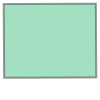

In [26]:
acc3.iloc[0].geometry

In [59]:
acc3.iloc[0]

gid                                                      다사594107
accident_cnt                                                    3
geometry        (POLYGON ((127.0425327222538 37.19420970044549...
Name: 1752, dtype: object

In [64]:
m = folium.Map(location=center, tiles='cartodbpositron', zoom_start=11)
folium.GeoJson(acc3.iloc[0]['geometry']).add_to(m)

In [65]:
m

## 9. 어린이 보호구역

In [27]:
보호구역 = pd.read_csv('9.오산시_어린이보호구역.csv')
보호구역

,시설종류,시설명,CCTV설치여부,CCTV설치대수,보호구역도로폭,보호구역_경도,보호구역_위도
0,특수학교,성심학교,N,0,25,127.017521,37.176762
1,초등학교,가수초등학교,Y,1,12,127.047957,37.148103
2,초등학교,광성초등학교,Y,2,12,127.039709,37.184197
3,초등학교,대호초등학교,Y,3,12,127.057889,37.159106
4,초등학교,매홀초등학교,Y,2,6,127.063282,37.162749
...,...,...,...,...,...,...,...
86,어린이집,시립세마어린이집,Y,1,12,127.044916,37.184608
87,어린이집,미래숲어린이집,Y,1,6,127.044384,37.145326
88,어린이집,시립은여울어린이집,N,0,20,127.066860,37.170952
89,어린이집,설리반어린이집,N,0,5,127.061041,37.164127


In [ ]:
# 일반적으로 도로폭 20 이상일 떄 보차 구분 있음
# 10, 12 도로폭이 일반적으로 주택가에서 접할 수 있는 보차 구분 없는 도로

# 보차 구분 없는 도로일 때 더 위험하지 않을까??? 
# 분석 해봐야겠지만 큰 차이가 없다면 기존 보호구역에서 보차 구분 없는곳에 방지턱 등등을 설치하는게 좋지 않을까

In [28]:
보호구역['보호구역도로폭'].value_counts().sort_index(ascending=False)

25     1
22     1
20     1
18     3
17     2
15     4
13     3
12    16
9      1
7      3
6     37
5      5
4      8
3      6
Name: 보호구역도로폭, dtype: int64

<AxesSubplot:>

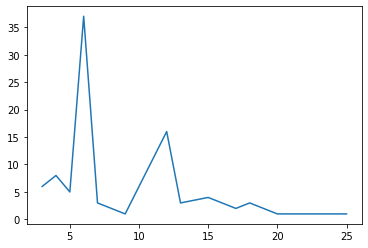

In [57]:
보호구역['보호구역도로폭'].value_counts().sort_index(ascending=False).plot()

In [15]:
# 오산시 위도/경도
# 위도 / 경도 : 337.163619, 127.049883
center = [37.163619, 127.049883]

In [41]:
# 오산시 지도 생성
m = folium.Map(location=center, tiles='cartodbpositron', zoom_start=11)
m

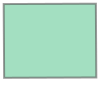

'/opt/app-root/src'